### Multi-Layer Perceptron 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import tensorflow as tf
from tensorflow import keras
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

In [3]:
# import the data
netflix = pd.read_csv('netflix_model_ready.csv')

In [4]:
# Change "date" column to ensure datetime type and drop weekends
netflix["date"] = pd.to_datetime(netflix["date"])

#### MPL With Features From Feature Selection Process

In [5]:
# TimeSeriesSplit the data
tss = TimeSeriesSplit(n_splits=5)

# Create feature dataframe based on feature selection results
X = netflix[["date", "Google_rs", "Dow_MAvg_s_Move", "Stock_gain", "Volume", "Dow_loss", "Dow_diff", 
             "Google_MAvg_s", "Google_MAvg", "Google_EMA", "Wiki_Move"]]

X = X.set_index("date")

# Create y target dataset
y = netflix["target_3"]

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [6]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04'],
              dtype='datetime64[ns]', name='date', length=601, freq=None)
DatetimeIndex(['2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=120, freq=None)


In [8]:
# Standardize the data
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train)
X_test_pca = scaler.fit_transform(X_test)

In [9]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=10)
history

# predict on test data
y_pred = model.predict(X_test)

Epoch 1/50
61/61 [==============================] - 1s 3ms/step - loss: 260686.5625 - accuracy: 0.4942 - val_loss: 7932.3794 - val_accuracy: 0.4333
Epoch 2/50
61/61 [==============================] - 0s 2ms/step - loss: 8119.6724 - accuracy: 0.5075 - val_loss: 1907.9984 - val_accuracy: 0.5667
Epoch 3/50
61/61 [==============================] - 0s 2ms/step - loss: 1507.1614 - accuracy: 0.5424 - val_loss: 86.6961 - val_accuracy: 0.5583
Epoch 4/50
61/61 [==============================] - 0s 2ms/step - loss: 7193.5107 - accuracy: 0.4892 - val_loss: 1550.3824 - val_accuracy: 0.4333
Epoch 5/50
61/61 [==============================] - 0s 2ms/step - loss: 2556.7625 - accuracy: 0.4642 - val_loss: 10852.5605 - val_accuracy: 0.4333
Epoch 6/50
61/61 [==============================] - 0s 2ms/step - loss: 9550.7344 - accuracy: 0.4958 - val_loss: 3802.8396 - val_accuracy: 0.4333
Epoch 7/50
61/61 [==============================] - 0s 2ms/step - loss: 3645.7661 - accuracy: 0.4559 - val_loss: 8010.4912 

<AxesSubplot:>

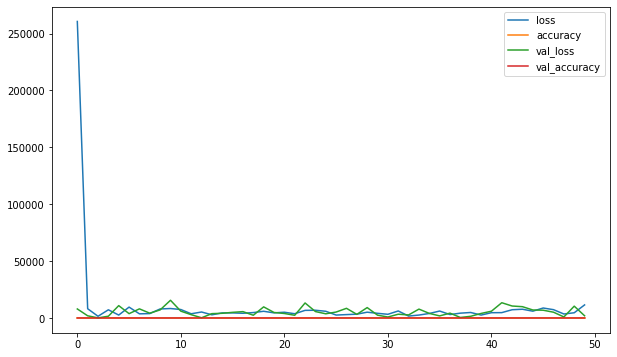

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,6))

#### MPL With PCA For Feature Reduction

In [47]:
# Time series train/test split
tss= TimeSeriesSplit(n_splits=2)

# Keep all features, but remove the five target variables
X = netflix.iloc[:, :-5]
X = X.set_index("date")

# Create series for target 
y = netflix.iloc[:, -3]

# Split tranining and test data by date
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [48]:
# Print index of train and test data to check that they are split correctly
print(X_train.index)
print(X_test.index)

DatetimeIndex(['2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05',
               ...
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-22', '2021-03-23'],
              dtype='datetime64[ns]', name='date', length=481, freq=None)
DatetimeIndex(['2021-03-24', '2021-03-25', '2021-03-26', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-04-01', '2021-04-23',
               '2021-04-26', '2021-04-27',
               ...
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-28',
               '2022-03-29', '2022-03-30'],
              dtype='datetime64[ns]', name='date', length=240, freq=None)


In [49]:
print(X_train.shape)
print(X_test.shape)

(481, 159)
(240, 159)


In [50]:
# check distirbution of target 
netflix["target_3"].value_counts()

1    372
0    349
Name: target_3, dtype: int64

In [51]:
# PCA feature reduction. 20 components is enough to explain ~85% of the variance (refer to Feture_selection notebook)
sklearn_pca = PCA(n_components=20)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.fit_transform(X_test_pca)

In [96]:
# Build MPL model
n_features = X_train_pca.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy']) # use binary_accuracy?

# Define early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=3)

# Fit model
history = model.fit(X_train_pca, 
                    y_train, 
                    epochs=40, 
                    validation_data=(X_test_pca, y_test), 
                    batch_size=13,
                    callbacks=[early_stopping_callback])
history


Epoch 1/40
37/37 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.4906 - val_loss: 0.7156 - val_accuracy: 0.5000
Epoch 2/40
37/37 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.5385 - val_loss: 0.7021 - val_accuracy: 0.5333
Epoch 3/40
37/37 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5426 - val_loss: 0.7029 - val_accuracy: 0.5042
Epoch 4/40
37/37 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6008 - val_loss: 0.7013 - val_accuracy: 0.5208
Epoch 5/40
37/37 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.5988 - val_loss: 0.6972 - val_accuracy: 0.5458
Epoch 6/40
37/37 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.5925 - val_loss: 0.7020 - val_accuracy: 0.5417
Epoch 7/40
37/37 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.6112 - val_loss: 0.7011 - val_accuracy: 0.5333
Epoch 8/40
37/37 [==

In [94]:
from sklearn.model_selection import RandomizedSearchCV

def create_model(nl=1, nn=256):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(n_features,)))
    for i in range(nl):
        model.add(Dense(nn, activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)

params = dict(nl=[1, 3, 5], nn=[64, 128, 256])

random_search = RandomizedSearchCV(model, param_distributions=params, cv=10)
random_search_results = random_search.fit(X_train_pca, y_train)
print("Best: %f using %s".format(random_search_results.best_score_, random_search_results.best_params_))

Epoch 1/10


C:\Users\alexa\AppData\Local\Temp/ipykernel_33888/4078679628.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10)
C:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


44/44 [==============================] - 0s 1ms/step - loss: 3.6200 - accuracy: 0.0000e+00
Epoch 2/10
44/44 [==============================] - 0s 1ms/step - loss: 2.3435 - accuracy: 0.0000e+00
Epoch 3/10
44/44 [==============================] - 0s 1ms/step - loss: 1.7517 - accuracy: 0.0116
Epoch 4/10
44/44 [==============================] - 0s 1ms/step - loss: 1.5415 - accuracy: 0.0278
Epoch 5/10
44/44 [==============================] - 0s 2ms/step - loss: 1.4522 - accuracy: 0.0208
Epoch 6/10
44/44 [==============================] - 0s 2ms/step - loss: 1.3593 - accuracy: 0.0093
Epoch 7/10
44/44 [==============================] - 0s 2ms/step - loss: 1.2915 - accuracy: 0.0093
Epoch 8/10
44/44 [==============================] - 0s 1ms/step - loss: 1.2371 - accuracy: 0.0116
Epoch 9/10
44/44 [==============================] - 0s 1ms/step - loss: 1.1908 - accuracy: 0.0093
Epoch 10/10
5/5 [==============================] - 0s 878us/step - loss: 0.9168 - accuracy: 0.0000e+00
Epoch 1/10
44/44 [

KeyboardInterrupt: 

In [89]:
model.evaluate(X_test_pca, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.7115 - accuracy: 0.5667


[0.7115411162376404, 0.5666666626930237]

In [72]:
# predict on test data
y_pred = model.predict(X_test_pca)


<AxesSubplot:>

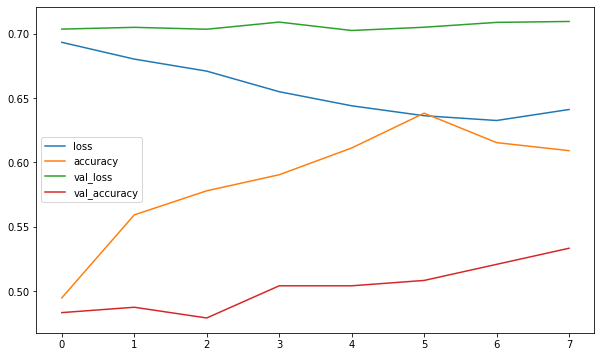

In [67]:
pd.DataFrame(history.history).plot(figsize=(10,6))

In [242]:
print('Train split:')
loss, acc = model.evaluate(X_train_pca, y_train, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Train split:
17/17 [==============================] - 0s 1ms/step - loss: 0.6323 - binary_accuracy: 0.6266
Accuracy: 62.66%


In [243]:
print('Test split:')
loss, acc = model.evaluate(X_test_pca, y_test, verbose=1)

print("Accuracy: %.2f%%" % (acc * 100))

Test split:
6/6 [==============================] - 0s 2ms/step - loss: 0.7192 - binary_accuracy: 0.5278
Accuracy: 52.78%


[Text(0, 0.5, 'True: 0'), Text(0, 1.5, 'True: 1')]

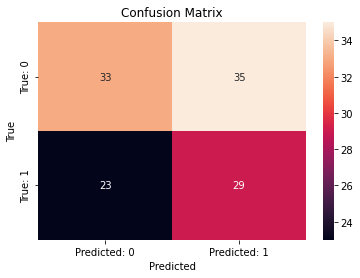

In [46]:
# Display confusion matrix results
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predicted = model.predict(X_test_pca)
predicted = (predicted > 0.5)

confusion = confusion_matrix(y_test, predicted)

sns.heatmap(confusion, annot=True, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(["Predicted: 0", "Predicted: 1"])
ax.yaxis.set_ticklabels(["True: 0", "True: 1"])

